In [1]:
import numpy as np
import seaborn as sns

In [10]:
class Simulation:
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = np.random.random(self.population_size)
        self.longevity = np.zeros(population_size) 
        
        self.history = [self.population]
        self.longevity_history = [self.longevity]
        self.minima = [self.population.min()]
        self.time = 1
        
    def step(self, num):
        for _ in range(num):
            pop = self.population.copy()

            self.longevity += np.ones(self.population_size)

            minval = pop.min()
            self.minima.append(minval)

            ind = np.where(pop == minval)[0][0]

            for i in range(3):
                self.longevity[(ind + i - 1) % self.population_size] = 0
                pop[(ind + i - 1) % self.population_size] = np.random.random()

            self.population = pop
            self.history.append(pop)
            self.time += 1

In [11]:
sim = Simulation(100)
sim.step(2000)

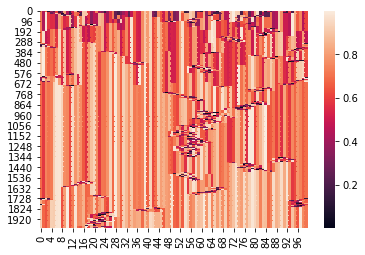

In [12]:
sns.heatmap(sim.history)

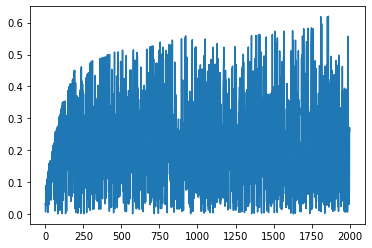

In [13]:
sns.lineplot(range(sim.time), sim.minima)